In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
np.random.seed(42)

In [50]:
def random_gauss_points(size, mu, sigma):
    if isinstance(size, int):
        size = [size]
    return sigma*np.random.randn(*size) + mu

def gauss_loglikelihood(points, mu, sigma):
    return np.sum(np.log(1/np.sqrt(2*np.pi*sigma**2)) - (mu-points)**2/(2*sigma**2))

def gauss_pointwise_likelihood(points, mu, sigma):
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(mu-points)**2/(2*sigma**2))

def maximization(points, mu1, sigma1, mu2, sigma2):
    likelihood1 = gauss_pointwise_likelihood(points, mu1, sigma1) #likelihood for distribution 1
    likelihood2 = gauss_pointwise_likelihood(points, mu2, sigma2) #likelihood for distribution 2
    posterior1 = (likelihood1*1/2)/(likelihood1+likelihood2) #prior = 1
    posterior2 = (likelihood2*1/2)/(likelihood1+likelihood2)
#     posterior1 = likelihood1>likelihood2 # hard assignment
#     posterior2 = likelihood2>likelihood1 # hard assignment
    return posterior1, posterior2

def expectation(points, posterior1, posterior2):
#     import ipdb; ipdb.set_trace()
    mu1 = np.sum(points*posterior1)/np.sum(posterior1)
    sigma1 = np.sqrt(np.sum((points-mu1)**2*posterior1)/np.sum(posterior1))
    mu2 = np.sum(points*posterior2)/np.sum(posterior2)
    sigma2 = np.sqrt(np.sum((points-mu2)**2*posterior2)/np.sum(posterior2))
    return mu1, sigma1, mu2, sigma2

# Data - Two Gaussian

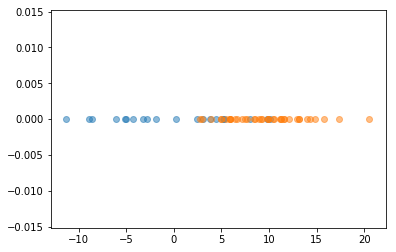

In [51]:
gauss1 = random_gauss_points(20, -3, 10)
gauss2 = random_gauss_points(40, 10, 5)
plt.scatter(gauss1, [0]*len(gauss1), alpha=0.5)
plt.scatter(gauss2, [0]*len(gauss2), alpha=0.5)

# Random initialization of distributions

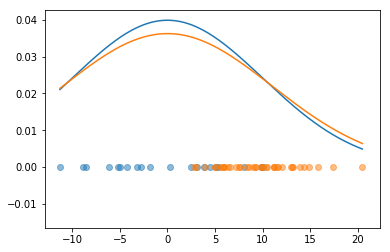

In [60]:
mu1 = 0
sigma1 = 10
mu2 = 0
sigma2 = 11
plt.scatter(gauss1, [0]*len(gauss1), alpha=0.5)
plt.scatter(gauss2, [0]*len(gauss2), alpha=0.5)
grid = np.linspace(min(np.hstack((gauss1,gauss2))), max(np.hstack((gauss1,gauss2))), 1000)
plt.plot(grid, 1/np.sqrt(2*np.pi*sigma1**2)*np.exp(-(mu1-grid)**2/(2*sigma1**2)))
plt.plot(grid, 1/np.sqrt(2*np.pi*sigma2**2)*np.exp(-(mu2-grid)**2/(2*sigma2**2)))

# EM optimization 

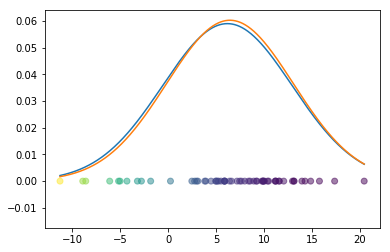

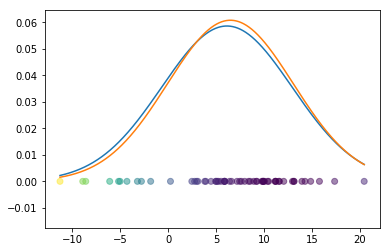

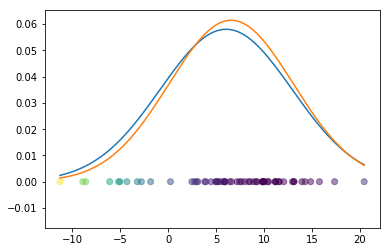

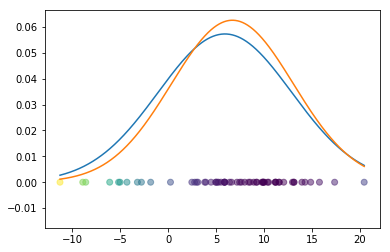

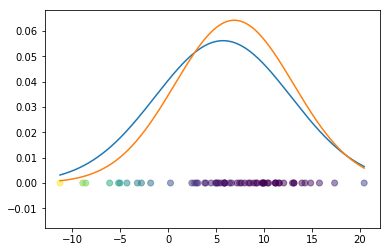

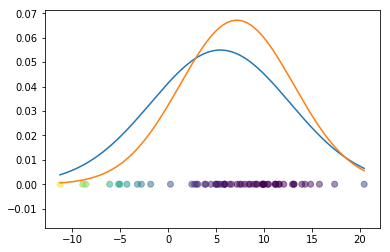

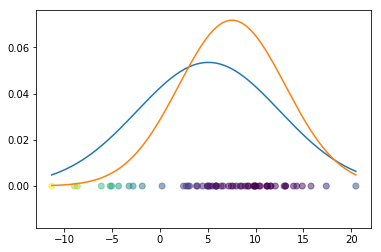

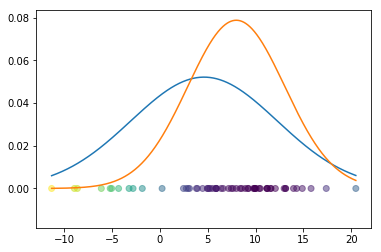

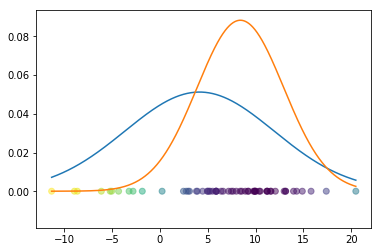

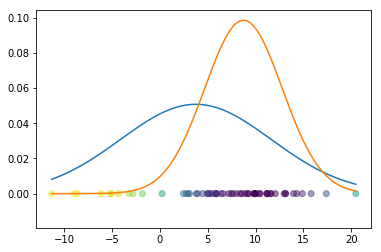

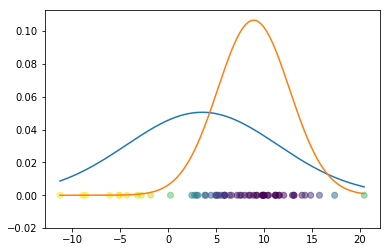

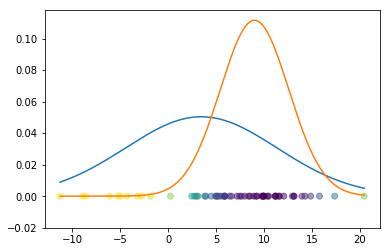

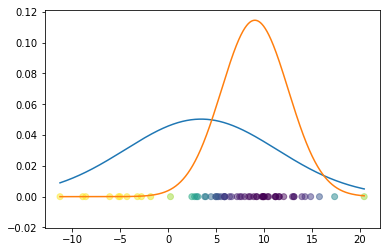

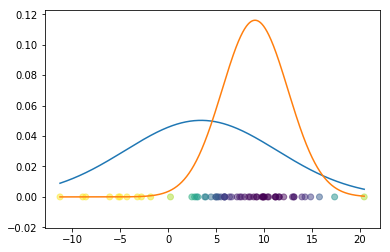

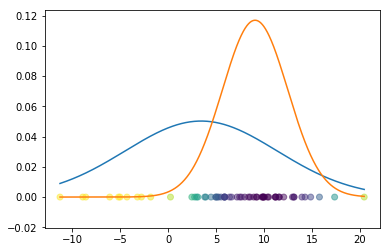

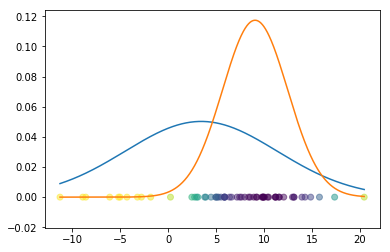

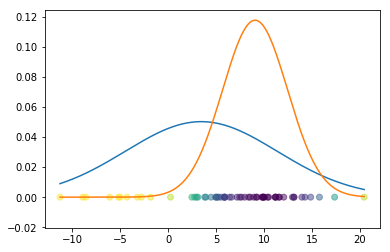

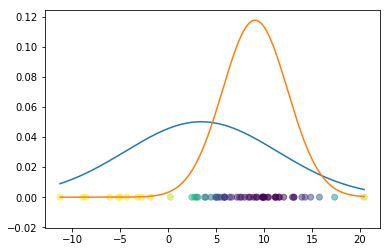

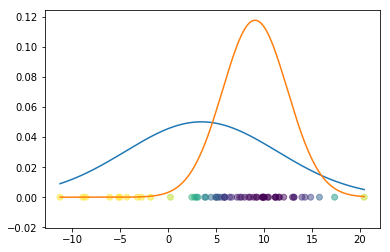

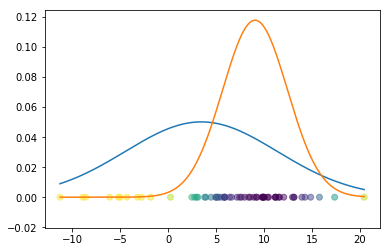

In [62]:
for step in range(20):
    print('mu1 ', mu1,sigma1)
    print('mu2 ',mu2, sigma2)

    posterior1, posterior2 = maximization(np.hstack((gauss1,gauss2)), mu1, sigma1, mu2, sigma2)
    mu1, sigma1, mu2, sigma2 = expectation(np.hstack((gauss1,gauss2)), posterior1, posterior2)
    plt.scatter(np.hstack((gauss1,gauss2)), [0]*(len(gauss1)+len(gauss2)), alpha=0.5, c=posterior1)
    grid = np.linspace(min(np.hstack((gauss1,gauss2))), max(np.hstack((gauss1,gauss2))), 1000)
    plt.plot(grid, 1/np.sqrt(2*np.pi*sigma1**2)*np.exp(-(mu1-grid)**2/(2*sigma1**2)))
    plt.plot(grid, 1/np.sqrt(2*np.pi*sigma2**2)*np.exp(-(mu2-grid)**2/(2*sigma2**2)))
    plt.show()